# Environment Setup

In [1]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['test.csv', 'csv_submission.csv', 'train.csv', 'gender_submission.csv']


# Data Set Preparation

In [3]:
df_raw = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0, encoding='utf-8')
df_test_raw = pd.read_csv(base_path_data + '/test.csv', sep=",", header=0, encoding='utf-8')

# Statistics

In [4]:
print('Column types')
print(df_raw.dtypes)

# Check which columns have missing data.
print('\nMissing values')
print(df_raw.isnull().any())

print('\nStats')
print(df_raw.describe())

print('\nSample')
df_raw.loc[:5,]

Column types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Stats
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
# Copied from article: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation

# 
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df_raw.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(df_raw.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values per row:
0    1
1    0
2    1
3    0
4    1
dtype: int64


In [6]:
{'Survived':df_raw.query('Survived == 1').count()[0], 'Did not':df_raw.query('Survived == 0').count()[0]}

{'Survived': 342, 'Did not': 549}

In [7]:
# Check people age under 1.
df_raw.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


# Visualization of Data

In [8]:
# Group by age and count to see the distribution.
age_2_count = df_raw.groupby('Age')['PassengerId'].count().reset_index(name="Count")
age_2_count.loc[:5,]

,Age,Count
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
5,1.00,7


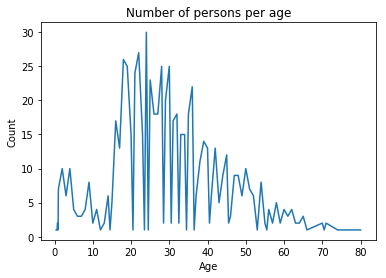

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use the binary classifier on all data.
Xs = age_2_count.loc[:,'Age']
Ys = age_2_count.loc[:,'Count']
plt.plot(Xs, Ys)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of persons per age')
plt.show()

# Preparing Training Data Set

In [10]:
def create_X(df_raw):
    features_clf = 'Pclass,Fare'.split(',')
    X = df_raw.loc[:, features_clf]

    # Add Sex as number.
    sex_to_number = lambda x: 1 if x == 'male' else 0

    X['Sex'] = df_raw.loc[:, 'Sex'].apply(sex_to_number)
    X.iloc[:5, :]

    return X
    
# Prepare the labels.
X = create_X(df_raw)
Y = df_raw.loc[:, 'Survived']

# 5-fold Cross Validation

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import clone

def cross_val_score_do(name, clf, X, Y, cv):
    # Cross validate the classifier.
    scores = cross_val_score(clf, X, Y, cv=cv)
    print("%s Score: %.10f" % (name, scores.mean()))
    
    # Fit the classifier and show the feature importance.
    clf_cloned = clone(clf)
    clf_cloned.fit(X, Y)
    print(list(zip(list(X.columns), clf_cloned.feature_importances_)))

clf_rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
cross_val_score_do('RandomForestClassifier', clf_rfc, X, Y, 5)

clf_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
cross_val_score_do('ExtraTreesClassifier', clf_etc, X, Y, 5)

clf_dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
cross_val_score_do('DecisionTreeClassifier', clf_dtc, X, Y, 5)

clf_gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=1, random_state=0)
cross_val_score_do('GradientBoostingClassifier', clf_gbc, X, Y, 5)

/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier Score: 0.8059611595
[('Pclass', 0.1145617434093584), ('Parch', 0.06240374091417652), ('Fare', 0.47065674697320425), ('Sex', 0.35237776870326104)]
ExtraTreesClassifier Score: 0.8003179318
[('Pclass', 0.14323772500645798), ('Parch', 0.04922039429803364), ('Fare', 0.42527564600551926), ('Sex', 0.38226623468998905)]
DecisionTreeClassifier Score: 0.8047808576
[('Pclass', 0.1143905777120011), ('Parch', 0.07534078780722894), ('Fare', 0.417324004791809), ('Sex', 0.392944629688961)]
GradientBoostingClassifier Score: 0.7800614727
[('Pclass', 0.12857142857142856), ('Parch', 0.08571428571428572), ('Fare', 0.7), ('Sex', 0.08571428571428572)]


# 5-fold Cross Validation with GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV

clf_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

parameters = {'max_features': [1, 4], 'n_estimators': [5, 10, 30]}

clf = GridSearchCV(clf_etc, parameters, cv=5)
clf_model = clf.fit(X, Y)

clf = clf_model.best_estimator_

In [13]:
# Display the scores.

clf_model.grid_scores_

/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80135, std: 0.02317, params: {'max_features': 1, 'n_estimators': 5},
 mean: 0.80359, std: 0.02846, params: {'max_features': 1, 'n_estimators': 10},
 mean: 0.80247, std: 0.02904, params: {'max_features': 1, 'n_estimators': 30},
 mean: 0.80135, std: 0.03104, params: {'max_features': 4, 'n_estimators': 5},
 mean: 0.80696, std: 0.02356, params: {'max_features': 4, 'n_estimators': 10},
 mean: 0.80247, std: 0.03805, params: {'max_features': 4, 'n_estimators': 30}]

In [14]:
from sklearn.metrics import confusion_matrix

X_prediction = clf.predict(X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, X_prediction)
tn, fp, fn, tp = cnf_matrix.ravel()

features_clf = X.columns

# Print features importance.
print(np.array(list(zip(features_clf, clf.feature_importances_))))

# Show confusion matrix.
# print(tn, fp, fn, tp)
print(cnf_matrix)
clf.score(X, Y)

[['Pclass' '0.13301182799277417']
 ['Parch' '0.06231545733069185']
 ['Fare' '0.4117280849875729']
 ['Sex' '0.39294462968896104']]
[[533  16]
 [ 59 283]]


0.9158249158249159

Confusion matrix, without normalization
[[533  16]
 [ 59 283]]
Normalized confusion matrix
[[0.97 0.03]
 [0.17 0.83]]


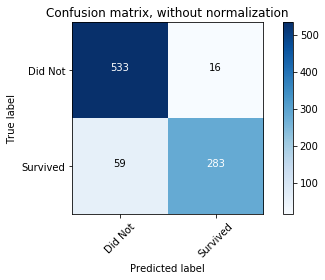

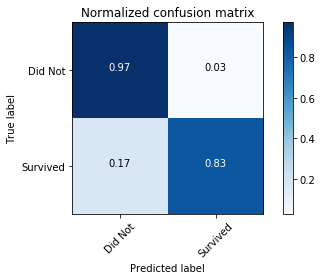

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)

class_names = ['Did Not', 'Survived']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Imputation of Missing Values

In [ ]:
# One method to show entries with NA values for Embarked column.
# nans = lambda df: df[df.isnull().any(axis=1)]
# nans(df_raw.loc[:, ['Embarked']])

# Another method to show entries, not working
# print(df_raw[df_raw['Embarked'].apply(np.isnan)])

# Preferred method to show entries where Embarked is null, NaN, etc.
print(df_raw.query('Embarked != Embarked'))
print(df_raw.isnull().any())

In [ ]:
# df_imp2 = df_raw['Embarked'].fillna(df_raw['Embarked'].value_counts().index[0])
df_raw['Name'].mode().values[0]

In [ ]:
df_imp2 = df_raw['Embarked'].fillna(df_raw['Embarked'].mode, inplace=True)


# df_imp2 = df_imp2.fillna(df_imp2['Age'].value_counts().index[0])

# df_imp2.query('Embarked != Embarked')

# df_imp2.apply(num_missing, axis=0)

In [ ]:
# Columns to keep.
features = 'Ticket,Fare'.split(',')

In [ ]:
from sklearn.preprocessing import Imputer

# Keep the features we can imput.
df_raw_2 = df_raw.loc[:, features]
df_test_raw_2 = df_test_raw.loc[:, features]

# print(df_raw_2.dtypes)
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
# imp.fit(df_raw_2)

In [ ]:
imp.fit(df_raw.loc[:, ['Embarked']])
# imp.transform(df_raw.loc[:, ['Embarked']])

In [ ]:
# Transform the df to imput missing values.

# Note: the imputer should works with string as the strategy is most_frequent, but here 
# Imputer complained that it could not convert Sex to float?!?!
# So we first compute for all numeric, then we stack the Sex column afterwards.

df_raw_no_na = pd.DataFrame(imp.transform(df_raw_2))

# Stack the Sex column to the rest of the imputed data.
df_raw_no_na['Sex'] = df_raw.loc[:, ['Sex']]['Sex'].values

# Set the columns
df_raw_no_na.columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

# Check the data frame after imputing.
print('\nCheck Training data set')
print(df_raw_no_na.iloc[:10,:])

# Fit the data test set.
imp.fit(df_test_raw_2)

df_test_raw_no_na = pd.DataFrame(imp.transform(df_test_raw_2))
df_test_raw_no_na['Sex'] = df_test_raw.loc[:, ['Sex']]['Sex'].values

df_test_raw_no_na.columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

# Check the data frame after imputing.
print('\nCheck Test data set')
print(df_test_raw_no_na.iloc[:10,:])

In [ ]:
# Data Types.
df_raw_no_na.dtypes

# CSV of Test Data Set Prediction

In [16]:
print(df_test_raw.isna().any())
print(df_test_raw.dtypes)

print(df_test_raw.iloc[:20,])
df_test_raw.query('Fare != Fare')

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
    PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [17]:
from sklearn.preprocessing import Imputer

X_test = create_X(df_test_raw)
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imp.fit(X_test)

X_test_predicted = clf.predict(imp.transform(X_test))

print(X_test.iloc[:10,])

   Pclass  Parch     Fare  Sex
0       3      0   7.8292    1
1       3      0   7.0000    0
2       2      0   9.6875    1
3       3      0   8.6625    1
4       3      1  12.2875    0
5       3      0   9.2250    1
6       3      0   7.6292    0
7       2      1  29.0000    1
8       3      0   7.2292    0
9       3      0  24.1500    1


In [19]:
df_to_submit = pd.DataFrame(list(zip(df_test_raw.loc[:,'PassengerId'], X_test_predicted)))
df_to_submit.columns = ['PassengerId', 'Survived']
df_to_submit.PassengerId = df_to_submit.PassengerId.astype(np.int32)
df_to_submit.Survived = df_to_submit.Survived.astype(np.int32)

df_to_submit.to_csv(base_path_data + '/csv_submission.csv', index=False)